In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)

import sys
import os
sys.path.insert(0,'..')

from util import read_data_in_dense_matrix, eval_prediction, store_dense_matrix_to_submission
from baselines import impute_by_Topic_Model

data_dir = '../../data/'

In [2]:
(train_matrix, test_matrix), (is_train, is_test) = read_data_in_dense_matrix(os.path.join(data_dir, 'data_train.csv'), n_col=1000, n_row=10000, test_size=0.2)

In [6]:
# tuning
num_epoch = 2000
num_topic_candidates = [3, 5, 10, 20, 30, 40]
dim_embed_candidates = [5]

best_num_topic = -1
best_dim_embed = -1
best_rmse = 999

for num_topic in num_topic_candidates:
    for dim_embed in dim_embed_candidates:
        prediction, loss_monitor = impute_by_Topic_Model(train_matrix, is_train, num_epoch, num_topic, dim_embed)
        rmse = eval_prediction(prediction, test_matrix, is_test)
        print(rmse)
        
        if rmse < best_rmse:
            best_rmse = rmse
            best_num_topic = num_topic
            best_dim_embed = dim_embed
            
print('best_num_topic = ',best_num_topic)
print('best_dim_embed = ',best_dim_embed)

Using: cuda


100%|███████████████████████████████████████| 2000/2000 [02:10<00:00, 15.32it/s]


1.1548483058304873
Using: cuda


100%|███████████████████████████████████████| 2000/2000 [02:10<00:00, 15.31it/s]


1.153169633993927
Using: cuda


100%|███████████████████████████████████████| 2000/2000 [02:10<00:00, 15.36it/s]


1.1535214001765164
Using: cuda


100%|███████████████████████████████████████| 2000/2000 [02:10<00:00, 15.35it/s]


1.155502915079924
Using: cuda


100%|███████████████████████████████████████| 2000/2000 [02:09<00:00, 15.39it/s]


1.1559421779203651
Using: cuda


100%|███████████████████████████████████████| 2000/2000 [02:09<00:00, 15.39it/s]

1.1563408619931805
best_num_topic =  5
best_dim_embed =  5


In [3]:
# num_epoch = 2000
# num_topic = 6
# dim_embed = 13
# prediction, loss_monitor = impute_by_Topic_Model(train_matrix, is_train, num_epoch, num_topic, dim_embed)
# rmse = eval_prediction(prediction, test_matrix, is_test)
# print(rmse)

Using: cuda


100%|███████████████████████████████████████| 2000/2000 [02:11<00:00, 15.25it/s]


1.1686544190392718


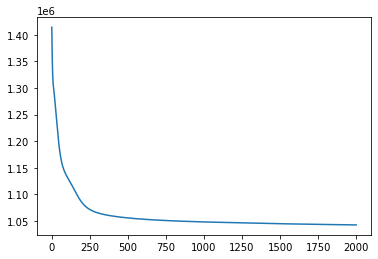

In [4]:
# import matplotlib.pyplot as plt
# plt.plot(loss_monitor)